In [1]:
import numpy as np
import pandas as pd
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [2]:
train.head()

,X1,X2,target
0,31,22,2
1,194,20,2
2,75,11,2
3,103,15,1
4,255,20,2


In [3]:
test.head()

,X1,X2,target
0,255,11,2
1,224,7,2
2,114,14,1
3,255,22,2
4,67,6,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      2500 non-null   int64
 1   X2      2500 non-null   int64
 2   target  2500 non-null   int64
dtypes: int64(3)
memory usage: 58.7 KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      5000 non-null   int64
 1   X2      5000 non-null   int64
 2   target  5000 non-null   int64
dtypes: int64(3)
memory usage: 117.3 KB


In [6]:
#train data preprocessing
x_train = train.iloc[:,0:2].values
y_train = train.iloc[:,2:].values

In [7]:
#test data preprocessing
x_test = test.iloc[:,0:2].values
y_test = test.iloc[:,2:].values

# SEPERATE DATA

In [8]:
# Combining X variables 
X_train = list(zip(train["X1"], train["X2"]))
X_test =  list(zip(test["X1"], test["X2"]))

Y_train = train.target
Y_test = test.target

In [9]:
#train data predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

accuracy_train_data = []

i_range = range(1,35,2)

for i in i_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,np.ravel(y_train))
    y_pred = knn.predict(x_train)
    accuracy_train_data.append(metrics.accuracy_score(y_train,y_pred))

print(accuracy_train_data)
    
best_train =np.max(accuracy_train_data)
best_k_value_train = accuracy_train_data.index(best_train)*2+1
print("Best Score ",best_train)
print("Best K-Value ",best_k_value_train)

[0.8692, 0.8472, 0.8256, 0.8388, 0.8428, 0.8412, 0.8504, 0.8472, 0.8424, 0.8404, 0.8364, 0.8352, 0.8328, 0.8308, 0.832, 0.8336, 0.8316]
Best Score  0.8692
Best K-Value  1


In [10]:
#test data predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

accuracy_test_data = []

for i in i_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,np.ravel(y_train))
    y_pred = knn.predict(x_test)
    accuracy_test_data.append(metrics.accuracy_score(y_test,y_pred))

print(accuracy_test_data)
    
best_test =np.max(accuracy_test_data)
best_k_value_test = accuracy_test_data.index(best_test)*2+1
print("Best Score ",best_test)
print("Best K-Value ",best_k_value_test)

[0.7992, 0.8076, 0.7944, 0.8094, 0.827, 0.8288, 0.8362, 0.8316, 0.8294, 0.8278, 0.8264, 0.8266, 0.825, 0.8236, 0.8234, 0.8236, 0.8198]
Best Score  0.8362
Best K-Value  13


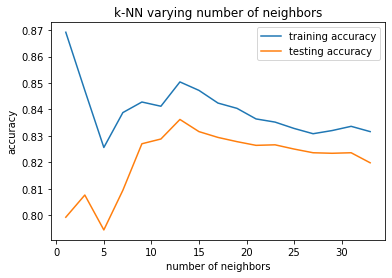

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.xlabel("number of neighbors")
plt.ylabel("accuracy")
plt.title("k-NN varying number of neighbors")
plt.plot(i_range,accuracy_train_data,label="training accuracy")
plt.plot(i_range,accuracy_test_data,label="testing accuracy")
plt.legend()
plt.show()

In [12]:
#train on training data using best k
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=best_k_value_train)
knn.fit(x_train,np.ravel(y_train))
test_pred = knn.predict(x_test)
train_pred = knn.predict(x_train)
print("kNN performance on training data")
print(metrics.classification_report(y_train,train_pred))
print(metrics.accuracy_score(y_train,train_pred))
print("kNN performance on testing data")
print(metrics.classification_report(y_test,test_pred))
print(metrics.accuracy_score(y_test,test_pred))

kNN performance on training data
              precision    recall  f1-score   support

           1       0.71      0.74      0.72       579
           2       0.92      0.91      0.91      1921

    accuracy                           0.87      2500
   macro avg       0.81      0.82      0.82      2500
weighted avg       0.87      0.87      0.87      2500

0.8692
kNN performance on testing data
              precision    recall  f1-score   support

           1       0.57      0.58      0.57      1167
           2       0.87      0.87      0.87      3833

    accuracy                           0.80      5000
   macro avg       0.72      0.72      0.72      5000
weighted avg       0.80      0.80      0.80      5000

0.7992
